In [1]:
import pandas as pd
import os
from nltk import sent_tokenize
import re
import seaborn as sns

In [9]:
!pip install rouge-score

In [2]:
df = pd.DataFrame(columns=['predict', 'ground_truth'])

In [3]:
label = pd.read_csv(r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\data\raw_data\data\test.csv', index_col=0)
label.head()

,summary,fullText
0,Bản_án cho đối_tượng giả_danh công_an để lừa_đảo,"Ngày 25/2 , TAND TP. Đà_Nẵng tuyên_phạt Hồ_Xuâ..."
1,Nam thanh_niên thủ_dâm trên xe_buýt từng bị xử...,Phát_hiện nam thanh_niên đang thủ_dâm trên xe_...
2,"Không được công_nhận , thuốc "" sinh con theo ý...",“ Baby_Support ” và “ Hello baby ” là hai cái ...
3,VEC từ_chối phục_vụ vĩnh_viễn 2 ô_tô gây_rối t...,Liên_quan đến vụ gây_rối tại trạm thu phí trên...
4,VKSND tỉnh Sóc_Trăng xin_lỗi oan sai “ nữ_hoàn...,Bà Huỳnh_Ngọc_Bích được mọi người biết đến là ...


In [4]:
df['ground_truth'] = label['summary']

In [10]:
import numpy as np
from rouge_score import rouge_scorer
from datetime import datetime

def rouge_scoring(df, raw_col, machine_col):
    scr_type = ['rouge1', 'rouge2', 'rougeL']
    scorer = rouge_scorer.RougeScorer(scr_type, use_stemmer=True)

    rouge_score = {'rouge1':{'precision':[],
                             'recall':[],
                             'fmeasure': []},
                   'rouge2':{'precision':[],
                             'recall':[],
                             'fmeasure': []},
                   'rougeL':{'precision':[],
                             'recall':[],
                             'fmeasure': []}}
    
    for i, r in df.iterrows():
        score_all = scorer.score(r[raw_col],r[machine_col])
        for t in scr_type:
                rouge_score[t]['precision'].append(score_all[t].precision)
                rouge_score[t]['recall'].append(score_all[t].recall)
                rouge_score[t]['fmeasure'].append(score_all[t].fmeasure)
    for t in scr_type:
        for k, v in rouge_score[t].items():
            rouge_score[t][k] = np.mean(np.array(v))
            print('{} ==== {}-{}: {}'.format(datetime.now(),t.upper(),k.upper(), np.mean(np.array(v))))
    return rouge_score

In [40]:
def visualize(scr, model):
    rouge1 = scr['rouge1']
    x1, y1 = zip(*rouge1.items())
    rouge2 = scr['rouge2']
    x2, y2 = zip(*rouge2.items())
    rouge2 = scr['rougeL']
    xL, yL = zip(*rougeL.items())

    a = pd.DataFrame(columns=['score', 'value', 'type'])
    a['score'] = ['rouge1']*3 + ['rouge2']*3 + ['rougeL']*3
    a['value'] = y1+y2+yL
    a['type'] = x1+x2+xL

    fig = sns.catplot(x="score", y="value", hue="type", kind="bar", data=a).set(title='ROUGE-scores of {}'.format(model), xlabel='', ylabel='Score')
    fig.savefig(r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\baseline_model\{}.png'.format(model))

# fastAbs

In [5]:
path = r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\data\output_fastabs\output'
files = os.listdir(path)
files.sort(key=lambda f: int(re.sub('\D', '', f)))
predict = []
for f in files:
    with open(os.path.join(path, f), 'r', encoding='utf8') as sum:
        data = sum.read()
    predict.append(data)

In [6]:
df['predict'] = predict

In [7]:
df.tail()

,predict,ground_truth
22639,mưa_đá ở nghệ_an,Mưa_đá trút xuống vùng_biên Nghệ_An làm hỏng n...
22640,tp hcm cấm tàu chạy trên sông sài_gòn,Tàu_cánh_ngầm TP HCM - Vũng_Tàu được chạy trở_lại
22641,chờ cơ_chế miễn học_phí cấp thcs,TP HCM nghiên_cứu chính_sách miễn học_phí THPT
22642,kiều_bào : ' kiều_bào là khơi gợi nhiệt_huyết ...,Thứ_trưởng Trần_Văn_Tùng : ' Tạo mọi thuận_lợi...
22643,thanh_tra xây_dựng cầu_vượt ở hà_nội : không l...,Hà_Nội phủ_nhận sai_phạm trong xây_dựng cầu_vượt


In [10]:
for i in range(90,101):
    print(df.loc[i, 'predict'])
    print(df.loc[i, 'ground_truth'])
    print('------------------')

tiết_lộ bất_ngờ về đối_tượng lương_văn_dư liên_lạc với mẹ nạn_nhân nói_dối
Mẹ nạn_nhân vụ án bộ xương khô ở Vĩnh_Phúc : Sau ngày gây án , nghi_phạm còn gọi điện vay tiền
------------------
cả gia_đình tử_vong trong căn nhà ở .
Bất_ngờ với nhân_thân của đôi nam_nữ tử_vong bất_thường trong căn nhà mới mua
------------------
an_ninh hình_sự 24 h : khởi_tố nguyên thượng_uý công_an vụ cài ma_tuý đẩy người vô_tội vào tù
An_ninh hình_sự 24 h : Bắt 4 yêu râu xanh thay nhau hãm_hiếp bé gái 14 tuổi ; Khởi_tố nguyên Thượng_uý công_an vụ cài ma_tuý đẩy người vô_tội vào tù
------------------
trưởng_phòng tài_chính bị đình_chỉ công_tác 15 ngày vì nghi_vấn lộ clip " nóng " với gái lạ
Đình_chỉ Trưởng_phòng Tài_chính để làm rõ thông_tin lộ clip " nóng " với gái lạ
------------------
phát_hiện : bắt_giữ đối_tượng vận_chuyển ma_tuý trên đường
Bắt_giữ đối_tượng vận_chuyển ma_tuý trong ngày đầu năm 2019
------------------
đột_kích quán bar , bắt_giữ hàng chục đối_tượng trong tiếng nhạc chát_chúa
Triệt_phá 

In [11]:
df = df.dropna()

In [41]:
rouge_score = rouge_scoring(df, 'ground_truth', 'predict')

2021-01-17 01:54:05.742471 ==== ROUGE1-PRECISION: 0.5676503097707387
2021-01-17 01:54:05.744469 ==== ROUGE1-RECALL: 0.5247372345428319
2021-01-17 01:54:05.748468 ==== ROUGE1-FMEASURE: 0.5335343900763853
2021-01-17 01:54:05.754464 ==== ROUGE2-PRECISION: 0.3152606714084578
2021-01-17 01:54:05.759456 ==== ROUGE2-RECALL: 0.2898246777769599
2021-01-17 01:54:05.763477 ==== ROUGE2-FMEASURE: 0.2950254740839309
2021-01-17 01:54:05.767472 ==== ROUGEL-PRECISION: 0.45303562570627065
2021-01-17 01:54:05.770478 ==== ROUGEL-RECALL: 0.4186615735482314
2021-01-17 01:54:05.774439 ==== ROUGEL-FMEASURE: 0.4256718528908243


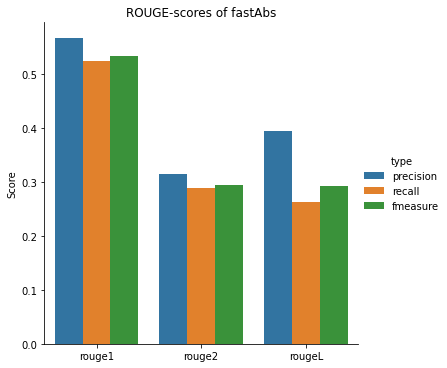

In [42]:
visualize(rouge_score, 'fastAbs')

# Baseline

In [17]:
out = pd.read_csv(r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\data\predict.csv', index_col=0)
out.head()

,fullText,originSum,machineSum
0,tài_xế quê bắc_giang để xe_khách lao xuống sôn...,xe_khách lao xuống sông do tài_xế,ôtô tải tông chết 2 xe_máy ở sài_gòn\n
1,bà melania và cậu út barron sẽ chuyển vào nhà_...,và con_trai chuyển vào nhà_trắng tuần,trump bị tổng_thống vì
2,hoa cùng bạn ngã xuống nước khi đi dạo quanh k...,nữ_sinh trượt chân mất_tích dưới hồ đá\n,hai nam sinh tử_vong khi tắm biển ở cuốn
3,tàu cá nghệ_an hỏng máy trôi_dạt cùng 10 thuyề...,ngư_dân dữ_dội trên tàu cá giữa biển\n,tàu cá ở biển
4,ngày 28 01 2019 công_trình trạm biến_áp hoà_lạ...,bộ_trưởng bộ khoa_học và gửi thư,ông làm


In [19]:
out['originSum'] = out['originSum'].apply(lambda x: x.replace('\n',''))
out['machineSum'] = out['machineSum'].apply(lambda x: x.replace('\n',''))

In [43]:
rouge_score_base = rouge_scoring(out, 'originSum', 'machineSum')

2021-01-17 01:55:37.998166 ==== ROUGE1-PRECISION: 0.47952337776602477
2021-01-17 01:55:37.998166 ==== ROUGE1-RECALL: 0.317102440969987
2021-01-17 01:55:37.998166 ==== ROUGE1-FMEASURE: 0.35524832119073296
2021-01-17 01:55:37.998166 ==== ROUGE2-PRECISION: 0.17995564990564986
2021-01-17 01:55:37.998166 ==== ROUGE2-RECALL: 0.12161773086734387
2021-01-17 01:55:37.999115 ==== ROUGE2-FMEASURE: 0.13300848465040166
2021-01-17 01:55:37.999115 ==== ROUGEL-PRECISION: 0.39552083863848564
2021-01-17 01:55:37.999115 ==== ROUGEL-RECALL: 0.26271269914781825
2021-01-17 01:55:37.999115 ==== ROUGEL-FMEASURE: 0.29308292757119575


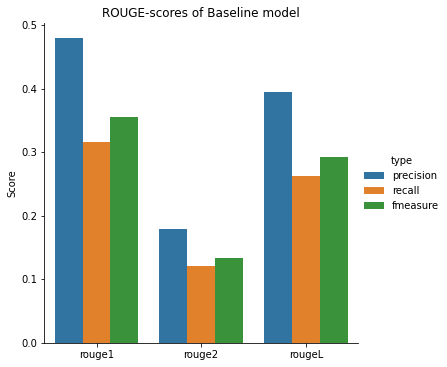

In [44]:
visualize(rouge_score_base, 'Baseline model')

# BERTSUM

In [45]:
bert_score = {
    'rouge1':{
        'precision': 0.14361,
        'recall': 0.92354,
        'fmeasure': 0.24455
    },
    'rouge2':{
        'precision': 0.08732,
        'recall': 0.59234,
        'fmeasure': 0.14972
    },
    'rougeL':{
        'precision': 0.81432,
        'recall': 0.12519,
        'fmeasure': 0.21355
    }
}

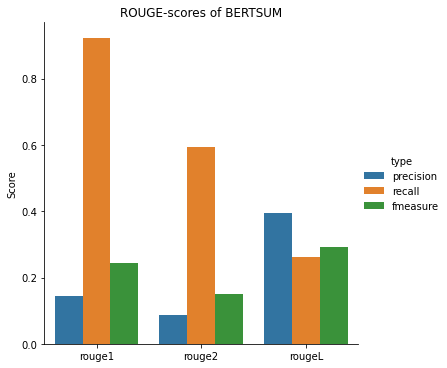

In [46]:
visualize(bert_score, 'BERTSUM')

# BASE + BERT

In [16]:
base = pd.read_csv(r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\baseline_model\predict_baseline_3bi.csv', index_col=0)
base.head()

,fullText,originSum,machineSum
0,cuối tháng 1 nga sẽ tổ_chức lễ giới_thiệu chín...,nga trình_làng tiêm_kích hạng nhẹ mới nhất mig...,nga sẽ có thêm siêu tiêm_kích f 35 bí_mật
1,đến 17h ngày 28 11 lực_lượng pccc tỉnh bình_dư...,lửa thiêu rụi xưởng sơn hàng ngàn mét_vuông,bình_dương xưởng gỗ cháy rụi nhiều giờ
2,kiếm phái là một liên_minh bao_gồm năm phái và...,kiếm_hiệp kim_dung sự_thật về kiếm phái nổi_ti...,kiếm_hiệp kim_dung lý_do khiến nhiều người nh...
3,ngay trong sáng nay 24 6 tất_cả các điểm thi ở...,bộ chỉ_đạo bà_rịa vũng_tàu khẩn_cấp niêm_phong...,thí_sinh được chấm điểm thi thpt quốc_gia 2019
4,cành hoa đào nhỏ khoảng 25 30 cm và cầm gọn tr...,đưa đào mai đi máy_bay như_thế_nào cho đúng,đào được đào hoa đào hoa dịp tết


In [49]:
base_rouge = rouge_scoring(base, 'originSum', 'machineSum')

2021-01-17 08:24:53.525838 ==== ROUGE1-PRECISION: 0.5519687657623383
2021-01-17 08:24:53.527843 ==== ROUGE1-RECALL: 0.4853556290117947
2021-01-17 08:24:53.527843 ==== ROUGE1-FMEASURE: 0.5039225291217303
2021-01-17 08:24:53.527843 ==== ROUGE2-PRECISION: 0.2674192319548357
2021-01-17 08:24:53.527843 ==== ROUGE2-RECALL: 0.2339672957589366
2021-01-17 08:24:53.527843 ==== ROUGE2-FMEASURE: 0.24387666560230972
2021-01-17 08:24:53.527843 ==== ROUGEL-PRECISION: 0.44392207263130673
2021-01-17 08:24:53.527843 ==== ROUGEL-RECALL: 0.39084639247848846
2021-01-17 08:24:53.527843 ==== ROUGEL-FMEASURE: 0.40573290945748264


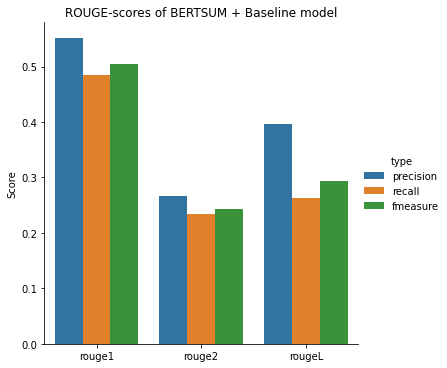

In [50]:
visualize(base_rouge, 'BERTSUM + Baseline model')

# Base 3 biLSTM

In [53]:
base = pd.read_csv(r'C:\Users\anhdq33\Downloads\VinBigData\Deep_Learning\Project\baseline_model\predict_baseline_3bi.csv', index_col=0)
base.head()

,fullText,originSum,machineSum
0,cuối tháng 1 nga sẽ tổ_chức lễ giới_thiệu chín...,nga trình_làng tiêm_kích hạng nhẹ mới nhất mig...,nga sẽ có thêm siêu tiêm_kích f 35 bí_mật
1,đến 17h ngày 28 11 lực_lượng pccc tỉnh bình_dư...,lửa thiêu rụi xưởng sơn hàng ngàn mét_vuông,bình_dương xưởng gỗ cháy rụi nhiều giờ
2,kiếm phái là một liên_minh bao_gồm năm phái và...,kiếm_hiệp kim_dung sự_thật về kiếm phái nổi_ti...,kiếm_hiệp kim_dung lý_do khiến nhiều người nh...
3,ngay trong sáng nay 24 6 tất_cả các điểm thi ở...,bộ chỉ_đạo bà_rịa vũng_tàu khẩn_cấp niêm_phong...,thí_sinh được chấm điểm thi thpt quốc_gia 2019
4,cành hoa đào nhỏ khoảng 25 30 cm và cầm gọn tr...,đưa đào mai đi máy_bay như_thế_nào cho đúng,đào được đào hoa đào hoa dịp tết


In [54]:
base_rouge = rouge_scoring(base, 'originSum', 'machineSum')

2021-01-17 13:15:09.061794 ==== ROUGE1-PRECISION: 0.5533322475510858
2021-01-17 13:15:09.062800 ==== ROUGE1-RECALL: 0.4840950694055508
2021-01-17 13:15:09.062800 ==== ROUGE1-FMEASURE: 0.5052884610211625
2021-01-17 13:15:09.062800 ==== ROUGE2-PRECISION: 0.281107626468043
2021-01-17 13:15:09.062800 ==== ROUGE2-RECALL: 0.24513349007149654
2021-01-17 13:15:09.062800 ==== ROUGE2-FMEASURE: 0.2551089128265158
2021-01-17 13:15:09.062800 ==== ROUGEL-PRECISION: 0.45122802628240777
2021-01-17 13:15:09.062800 ==== ROUGEL-RECALL: 0.3928788717096173
2021-01-17 13:15:09.062800 ==== ROUGEL-FMEASURE: 0.4108747040457004
